In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import numpy
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Import Files
order = pd.read_csv('orders.csv')
user = pd.read_csv('users.csv')

In [3]:
order.head()

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False


In [4]:
user.head()

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
2,3,NaN,26,US,4
3,4,NaN,54,US,7
4,5,F,34,US,38


In [3]:
# Merge files
dataset = pd.merge(order,user, how = 'left', left_on = 'user_id', right_on = 'id')

In [4]:
dataset = dataset.drop('id_y',axis=1)

In [5]:
# Check if merged correcly
dataset.head()

,id_x,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10


In [6]:
# check column availability
dataset.isnull().sum(axis = 0)
# there are some missing genders, not all the orders have discount. no missings for other columns. data availability is good.   

id_x                        0
user_id                     0
order_time                  0
item_total                  0
shipping_cost               0
discounts_applied       47438
payment_reject              0
gender                  17386
age                         0
country                     0
days_on_site_in_2016        0
dtype: int64

In [7]:
# check if there are duplicated orders
dup = dataset[dataset.duplicated(['id_x'])]
print(dup)
# no dups

Empty DataFrame
Columns: [id_x, user_id, order_time, item_total, shipping_cost, discounts_applied, payment_reject, gender, age, country, days_on_site_in_2016]
Index: []


In [8]:
# Understand column type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51738 entries, 0 to 51737
Data columns (total 11 columns):
id_x                    51738 non-null int64
user_id                 51738 non-null int64
order_time              51738 non-null object
item_total              51738 non-null float64
shipping_cost           51738 non-null int64
discounts_applied       4300 non-null float64
payment_reject          51738 non-null bool
gender                  34352 non-null object
age                     51738 non-null int64
country                 51738 non-null object
days_on_site_in_2016    51738 non-null int64
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 4.4+ MB


In [14]:
# Understand data size
dataset.shape

(51738, 19)

In [8]:
# Split order time to Year-Month-Day column and Hour-Minute-Second column
dataset[['order_ymd','order_hms']] = dataset.order_time.str.split(" ",expand=True)
dataset.head()

,id_x,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,order_ymd,order_hms
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29,2016-01-01,0:03:11
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28,2016-01-01,0:09:32
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29,2016-01-01,0:17:26
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3,2016-01-01,0:44:04
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10,2016-01-01,0:52:23


In [10]:
# Split more
dataset[['order_year','order_month','order_day']] = dataset.order_ymd.str.split("-",expand=True)
dataset[['order_hour','order_minute','order_second']] = dataset.order_hms.str.split(":",expand=True)
dataset.head()

,id_x,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,order_ymd,order_hms,order_year,order_month,order_day,order_hour,order_minute,order_second
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29,2016-01-01,0:03:11,2016,01,01,0,03,11
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28,2016-01-01,0:09:32,2016,01,01,0,09,32
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29,2016-01-01,0:17:26,2016,01,01,0,17,26
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3,2016-01-01,0:44:04,2016,01,01,0,44,04
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10,2016-01-01,0:52:23,2016,01,01,0,52,23


In [207]:
# Failure code for working with datetime. Decided to parse object.

#pd.to_datetime(dataset['order_time'],format = '%m/%d/%y %H:%M:%S')
#dataset['order_time'] =dataset['order_time'].astype(str)
#dataset['order_time'] = pd.to_datetime(dataset['order_time'].astype(str))
#dataset['order_date_parsed'] = pd.to_datetime(dataset['order_time'].str,errors='coerce',format = "%d-%b-%y %H:%M:%S") #unit='s' '%m/%d/%y %H:%M:%S'
#dataset['order_time'] = dt.strptime(dataset['order_time'],'%m/%d/%y %H:%M:%S')
#pd.Timestamp.month(dataset['order_time'])
#mydate = datetime.datetime.now()
#mydate.strftime("%B") 
#mydate.strftime("%b")
#dataset.order_date_parsed.head()

In [11]:
dataset['order_hour'] = dataset['order_hour'].astype(str).astype(int)
dataset['order_hour'].dtypes

dtype('int32')

In [8]:
#print(sns.__version__)  # dir(sns)

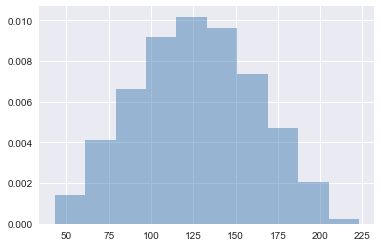

In [233]:
# Item total of orders are normally distributed. Most orders are around $125.
plt.hist(dataset['item_total'], bins=10, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue');

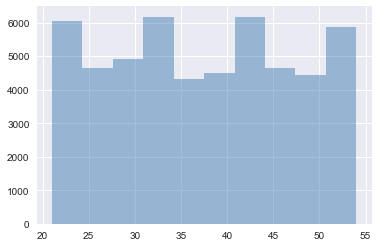

In [14]:
plt.hist(dataset['age'], bins=10, alpha=0.5,
         histtype='stepfilled', color='steelblue');

In [63]:
# Spend and days on site correlated? Create a table with aggregated item total and days on site first for later use. 
customer_agg = dataset.groupby(['user_id']).agg({'item_total':'sum','days_on_site_in_2016':'sum'})
customer_agg.head()

,item_total,days_on_site_in_2016
user_id,,
2,1169.40,80
3,244.73,8
4,336.20,14
5,1887.80,608
6,96.27,2


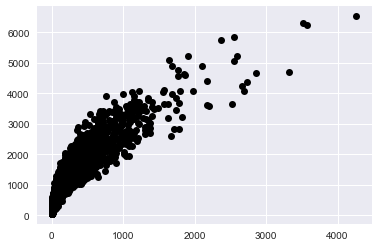

In [46]:
# From scatter plot, we can tell they are strongly postively correlated.  
plt.plot(customer_agg['days_on_site_in_2016'], customer_agg['item_total'],  'o', color='black');

In [47]:
# run spearman's correlation to find out two numeric variable's correlation
spearmanr(customer_agg['days_on_site_in_2016'], customer_agg['item_total'])

SpearmanrResult(correlation=0.95615234592218723, pvalue=0.0)

In [53]:
customer_agg['item_total_rank'] = customer_agg['item_total'].rank(pct = True)
customer_agg['days_on_site_rank'] = customer_agg['days_on_site_in_2016'].rank(pct = True)
customer_agg['diff'] = customer_agg['days_on_site_rank'] - customer_agg['item_total_rank']

# Users who spend short time on site but spent relatively more
customer_agg.sort_values(by=['diff'],ascending=True).head(3)

,item_total,days_on_site_in_2016,item_total_rank,days_on_site_rank,diff
user_id,,,,,
2261,589.19,9,0.553812,0.269556,-0.284257
6497,556.54,9,0.530499,0.269556,-0.260943
2156,408.28,4,0.416127,0.156061,-0.260066


In [54]:
# Users who spend long time on site but spent relatively less
customer_agg.sort_values(by=['diff'],ascending=False).head(3)

,item_total,days_on_site_in_2016,item_total_rank,days_on_site_rank,diff
user_id,,,,,
9086,304.35,80,0.315195,0.679210,0.364015
1261,251.00,52,0.252112,0.592814,0.340702
5993,251.39,52,0.252441,0.592814,0.340373


In [32]:
# Use Contingency Table to study the correlation between country and shipping cost
pd.crosstab(dataset['country'],dataset['shipping_cost'])

# US always have shipping cost of either 10 or 15. CAN always have shipping cost of either 20 or 25.

shipping_cost,10,15,20,25
country,,,,
CA,0,0,1162,3587
US,18739,28250,0,0


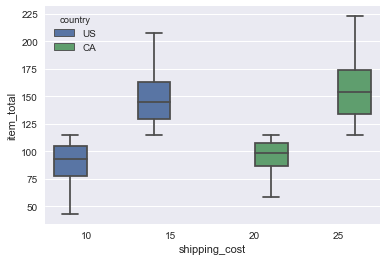

In [33]:
# from boxplot we can see for both country, once passing a certain amount somewhere between 100 and 125, shipping cost increase.
sns.boxplot(x='shipping_cost',y='item_total',hue="country" ,data=dataset)

In [34]:
# What is that breaking amount? $115
ship_agg = dataset.groupby(['shipping_cost']).agg({'item_total':['min','max'] })
print(ship_agg)

              item_total        
                     min     max
shipping_cost                   
10                 43.04  114.99
15                115.00  207.94
20                 58.22  114.99
25                115.02  222.96


In [98]:
# Calculatee rejecting rate
reject_agg = dataset.groupby(['payment_reject']).agg({'id_x':['count'] })
reject_agg.apply(lambda x: x/x.sum()).round(3)

,id_x
,count
payment_reject,
False,0.99
True,0.01


In [82]:
# Calculate percentage of deals with discount
print('Discounts Applied Orders Count: ', len(dataset[dataset['discounts_applied'] > 0]))
print('Total Orders Count: ' , dataset['id_x'].count())
print('Percentage of Deals with Discounts: ' , round(len(dataset[dataset['discounts_applied'] > 0]) / dataset['id_x'].count(),4 ))

Discounts Applied Orders Count:  4300
Total Orders Count:  51738
Percentage of Deals with Discounts:  0.0831


In [107]:
# Make bin out of age
dataset['age_bin'] = pd.qcut(dataset['age'], q=8, precision=0)

In [71]:
age_agg = dataset.groupby(['age_bin']).agg({'id_x':'count',
                                        'item_total':['sum','mean']         
                                }).round()
print(age_agg)

# Overall not too much difference among age groups in count. (41, 46] contributes the most sales. Mean increase when age increase. 

          id_x item_total       
         count        sum   mean
age_bin                         
[21, 25]  7489   727933.0   97.0
(25, 29]  6464   691124.0  107.0
(29, 33]  6181   708542.0  115.0
(33, 37]  5972   731993.0  123.0
(37, 41]  6247   816630.0  131.0
(41, 46]  7546  1050209.0  139.0
(46, 50]  5976   889457.0  149.0
(50, 54]  5863   923733.0  158.0


In [17]:
# No seasonality is found. Second half of the year item total remain high while first half is slightly more unstable
month_agg = dataset.groupby(['order_month']).agg({'id_x':'count',
                                           'item_total':['sum','mean']         
                                }).round()
print(month_agg)

             id_x item_total       
            count        sum   mean
order_month                        
01           4319   546138.0  126.0
02           4113   520723.0  127.0
03           4414   558491.0  127.0
04           4144   521513.0  126.0
05           4400   555593.0  126.0
06           4226   532287.0  126.0
07           4304   544696.0  127.0
08           4393   556565.0  127.0
09           4333   547812.0  126.0
10           4408   556437.0  126.0
11           4278   544586.0  127.0
12           4406   554779.0  126.0


(300000, 560379.08850000007)

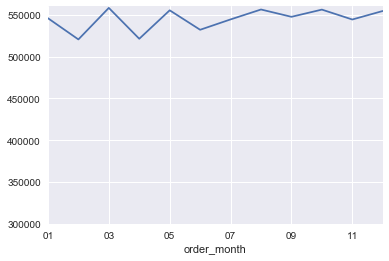

In [22]:
ax1 = dataset.groupby('order_month')['item_total'].sum().plot(kind='line')
ax1.set_ylim(ymin=300000)

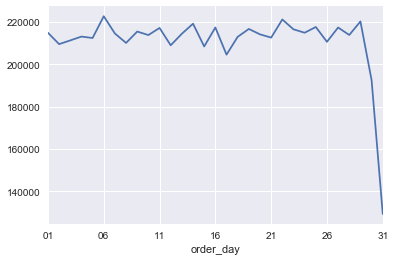

In [43]:
# Order amount doesn't change much over days
dataset.groupby('order_day')['item_total'].sum().plot(kind='line')

(240000, 297163.89150000014)

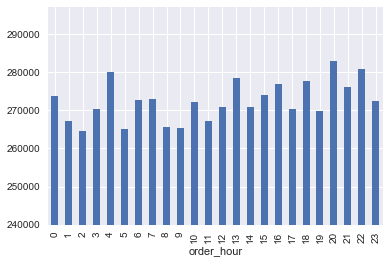

In [62]:
ax3 = dataset.groupby('order_hour')['item_total'].sum().plot(kind='bar')
ax3.set_ylim(ymin=240000)
# Evening time has slighly more sales but no obvious peak hour. 

In [108]:
# Make pivot table to look at items vs age and gender
con_gen_agg = dataset.groupby(['country','gender']).agg({'id_x':'count',
                                           'item_total':['sum','mean']         
                                }).round().reset_index() 
print(con_gen_agg)

print( '\n')

con_agg = dataset.groupby(['country']).agg({'item_total':['sum']         
                                }).round()
print(con_agg.apply(lambda x: x/x.sum()))

print( '\n')

age_gen_agg = dataset.groupby(['age_bin','gender']).agg({'user_id':['count']         
                                })
print(age_gen_agg.apply(lambda x: x/x.sum()))

  country gender   id_x item_total       
                  count        sum   mean
0      CA      F   1610   231167.0  144.0
1      CA      M   1571   221650.0  141.0
2      US      F  15612  1941382.0  124.0
3      US      M  15559  1946571.0  125.0


        item_total
               sum
country           
CA        0.102679
US        0.897321


                  user_id
                    count
age_bin  gender          
[21, 25] F       0.075803
         M       0.068351
(25, 29] F       0.064130
         M       0.060753
(29, 33] F       0.053563
         M       0.065469
(33, 37] F       0.057027
         M       0.057901
(37, 41] F       0.064683
         M       0.061801
(41, 46] F       0.072019
         M       0.070360
(46, 50] F       0.053185
         M       0.060462
(50, 54] F       0.060928
         M       0.053563


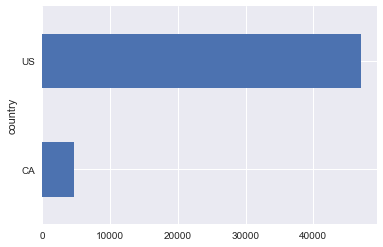

In [18]:
dataset.groupby('country')['id_x'].count().plot(kind='barh')

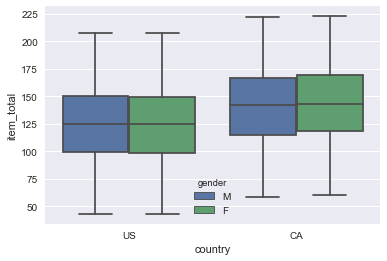

In [56]:
sns.boxplot(x='country',y='item_total',hue='gender',data=dataset)

In [75]:
dataset.describe()

,id_x,user_id,item_total,shipping_cost,discounts_applied,age,days_on_site_in_2016,order_hour
count,51738.000000,51738.000000,51738.000000,51738.000000,4300.0,51738.000000,51738.000000,51738.000000
mean,25869.500000,5006.494646,126.398776,13.994646,5.0,37.357436,19.788898,11.566933
std,14935.618451,2890.480242,35.045324,3.941930,0.0,9.787556,13.885279,6.939224
min,1.000000,2.000000,43.040000,10.000000,5.0,21.000000,1.000000,0.000000
25%,12935.250000,2543.000000,100.750000,10.000000,5.0,29.000000,10.000000,6.000000
50%,25869.500000,4973.000000,126.410000,15.000000,5.0,37.000000,17.000000,12.000000
75%,38803.750000,7487.000000,152.047500,15.000000,5.0,46.000000,27.000000,18.000000
max,51738.000000,10000.000000,222.960000,25.000000,5.0,54.000000,87.000000,23.000000
